In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import pywt

/Users/nikita/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.spatial import distance as dist

In [23]:
from scipy.spatial.distance import euclidean

In [4]:
dataset = pd.read_csv("../../datasets/binary_regression/ds_1/dataset.csv", index_col=0, )

In [5]:
df = dataset #[dataset.label != 1]

In [6]:
len(df)

35

In [7]:
df.describe()

,e_0,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,...,e_91,e_92,e_93,e_94,e_95,e_96,e_97,e_98,e_99,label
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,407.285714,404.314286,402.857143,400.542857,403.942857,402.171429,401.685714,396.200000,397.114286,398.457143,...,395.342857,396.228571,397.257143,396.085714,397.085714,398.600000,400.028571,399.371429,400.714286,0.514286
std,38.797795,43.463826,40.876531,36.699369,38.440896,44.494207,43.925586,40.911526,41.227326,44.575345,...,24.474408,25.276222,27.560994,30.990863,27.712146,23.921686,27.628295,32.414671,31.259419,0.507093
min,332.000000,332.000000,334.000000,337.000000,342.000000,334.000000,336.000000,333.000000,332.000000,333.000000,...,354.000000,340.000000,337.000000,341.000000,356.000000,354.000000,338.000000,341.000000,345.000000,0.000000
25%,375.500000,364.500000,365.000000,364.500000,365.500000,364.000000,360.500000,356.500000,359.000000,357.000000,...,382.000000,380.500000,382.500000,372.000000,375.500000,382.000000,380.500000,377.000000,383.000000,0.000000
50%,417.000000,410.000000,395.000000,400.000000,411.000000,401.000000,390.000000,391.000000,406.000000,412.000000,...,395.000000,394.000000,392.000000,392.000000,395.000000,392.000000,397.000000,396.000000,395.000000,1.000000
75%,440.500000,446.000000,440.000000,433.500000,436.500000,447.000000,445.500000,433.000000,437.500000,439.000000,...,408.500000,408.500000,419.000000,418.000000,414.000000,414.000000,426.500000,428.500000,428.500000,1.000000
max,459.000000,461.000000,459.000000,454.000000,458.000000,459.000000,460.000000,453.000000,451.000000,458.000000,...,455.000000,452.000000,454.000000,463.000000,454.000000,442.000000,452.000000,467.000000,459.000000,1.000000


In [8]:
# X_values = df.loc[:, "e_0":"e_59"].to_numpy()
# lables_my = [] #df.label #[]
# for l in df.label[:]:
#     if l == 1:
#         lables_my.append(1)
#     elif l == 0 :
#         lables_my.append(0)
#     elif l == -1 :
#         lables_my.append(1)

In [9]:
# tmp = df.loc[3:, "e_0":"e_99"].to_numpy()
# X_values = []
# for each in tmp:
#     index = -1
#     try:
#         index = list(each).index(0)
#     except:
#         pass
#     if index != -1:
#         avg = sum(each[:index]) / index
#         for i in range(index, len(each)):
#             each[i] = avg
#     wavelet = pywt.dwt(each, 'db1')
#     X_values.append(smooth( wavelet[0] ))#smooth(smooth(smooth(smooth(each)))))
# lables_my = [] #df.label #[]
# label_ds = df.loc[3:, "label"].to_numpy()
# for l in df.label[:]:
#     if l == 1:
#         lables_my.append(1)
#     elif l == 0 :
#         lables_my.append(0)
#     elif l == -1 :
#         lables_my.append(-1)

In [13]:
bias = 5
tmp = df.loc[bias:, "e_0":"e_99"].to_numpy()
lables_my = [] #df.label #[]
label_ds = df.loc[bias:, "label"].to_numpy()

X_values = []
for i, each in enumerate(tmp):
    index = -1
    try:
        index = list(each).index(0)
    except:
        pass
    if index != -1:
        avg = sum(each[:index]) / index
        for i in range(index, len(each)):
            each[i] = avg
    wavelet = pywt.dwt(each, 'db1')
    tmp = wavelet[0]
    value = smooth(tmp)
    #smooth(smooth(smooth(smooth(each)))))
    
    l = label_ds[i]
    if l == 1:
        lables_my.append(1)
        X_values.append(value)
    elif l == 0 :
        lables_my.append(0)
        X_values.append(value)
    elif l == -1 :
        pass
#         lables_my.append(-1)
#         X_values.append(value)

    

In [14]:
lables_my[:20], lables_my[10]

([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 1)

In [15]:
len(lables_my), len(X_values)

(30, 30)

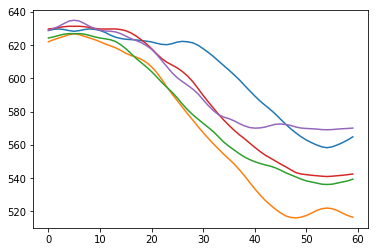

In [16]:
# lables_my[:5]
for v in X_values[:5]:
    plt.plot(v)
plt.show()

In [17]:
len(X_values[0])

60

In [28]:
def get_distance_list(target_vec, vectors):
    result = []
    for i, vec in enumerate(vectors):
        result.append([i, vec, euclidean(vec, target_vec)])
    a = np.array(result)
    res = a[a[:,2].argsort()]
    return res

def get_nearest(vectors, amount):
    pass
# a[a[:,1].argsort()]

In [29]:
amount = 5
ds_amount = 120

In [30]:
ind = lables_my.index(1)
vec = X_values[ind]
label = lables_my[ind]
vectors = get_distance_list(vec, X_values[:ds_amount])
plt.close()

In [31]:
tmp = []
for i, v in enumerate(vectors[:amount]):
    print(v[0], v[2], lables_my[v[0]])
    if i == 0:
        plt.plot(v[1], 'r', label="Сигнал для поиска")
    elif lables_my[v[0]] == label:
        tmp = v[1]
        plt.plot(v[1], 'g')
    else:
        plt.plot(v[1], 'b')

plt.plot(v[1], 'g', label="Найденный сигнал")
plt.title("Поиск сигнала в БД")
plt.legend()
# plt.show()
plt.savefig("search_1.png")

0 0.0 1
4 120.00050967763863 1
3 155.234954957708 1
6 192.59221410079846 1
7 207.5138881723425 1


In [32]:
plt.close()

In [33]:
ind = lables_my.index(0)
vec = X_values[ind]
label = lables_my[ind]
vectors = get_distance_list(vec, X_values[:ds_amount])

13 0.0 0
26 324.0054414993805 0
28 350.3949087089052 0
21 390.00533467883565 0
29 421.39311068086215 0


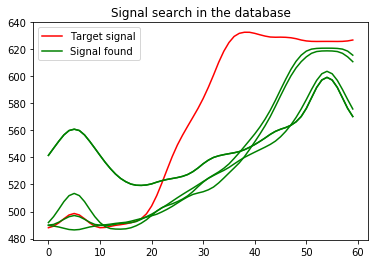

In [46]:
tmp = []
for i, v in enumerate(vectors[:amount]):
    print(v[0], v[2], lables_my[v[0]])
    if i == 0:
        plt.plot(v[1], 'r', label="Target signal")
    elif lables_my[v[0]] == label:
        tmp = v[1]
        plt.plot(v[1], 'g')
    else:
        plt.plot(v[1], 'b')

plt.plot(v[1], 'g', label="Signal found")
plt.title("Signal search in the database")
plt.legend()
plt.show()
# plt.savefig("search_0_en.png")

In [51]:
ind = lables_my.index(1)
vec = X_values[ind]
label = lables_my[ind]
vectors = get_distance_list(vec, X_values[:ds_amount])

In [54]:
for i, v in enumerate(vectors[:amount]):
    print(v[0], v[2], lables_my[v[0]])
    if i == 0:
        plt.plot(v[1], 'r', label="Target signal")
    elif lables_my[v[0]] == label:
        tmp = v[1]
        plt.plot(v[1], 'g')
    else:
        plt.plot(v[1], 'b')

plt.plot(v[1], 'g', label="Signal found")
plt.title("Signal search in the database")
plt.legend()
# plt.show()
# plt.savefig("search_1_en.png")

0 0.0 1
4 120.00050967763863 1
3 155.234954957708 1
6 192.59221410079846 1
7 207.5138881723425 1


In [37]:
score_pos = 0
score_neg = 0
for i, label_m in enumerate(lables_my):
    ind = lables_my.index(label_m)
    vec = X_values[ind]
    vectors = get_distance_list(vec, X_values[:250])
    v = vectors[1]
    if lables_my[v[0]] == label_m:
        score_pos += 1
    else:
        score_neg += 1

In [1349]:
score_pos, score_neg

(30, 0)

In [864]:
try:
    list(tmp[2]).index(0)
except:
    pass

In [865]:
smooth_X = smooth(X_values[1])

In [866]:
# for i in range(5):
#     smooth_X = smooth(X_values[i])
#     fft = np.fft.fft(smooth_X)
# #     int(len(fft)/2)
#     print(lables_my[i])
#     plt.plot(fft[1:20], 'g')
# #     plt.plot(tmp[i], 'y')
# #     plt.plot(smooth_X, "b")
# #     plt.plot(X_values[i], "r")
#     plt.show()

In [867]:
X_train, X_test, y_train, y_test = train_test_split(X_values, lables_my, test_size=0.33, random_state=42)

In [868]:
# y_test

In [869]:
reg = LogisticRegression()

In [870]:
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [871]:
reg.score(X_test, y_test)

0.9

In [872]:
ind = 3
reg.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [873]:
y_test

[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]

In [874]:
clf = GradientBoostingClassifier(random_state=0,)

In [875]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [876]:
clf.score(X_test, y_test)

1.0

In [877]:
ind = 20
clf.predict(X_test[:ind])

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [878]:
y_test[:ind]

[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]

In [879]:
from sklearn.linear_model import Perceptron

In [880]:
perc = Perceptron(tol=1e-3, random_state=0)

In [881]:
perc.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [882]:
perc.score(X_test, y_test)

0.9

In [883]:
from sklearn.neural_network import MLPClassifier

In [884]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 32, 16, 8, 2), random_state=1)

In [885]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 32, 16, 8, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [886]:
mlp.score(X_test, y_test)

0.9

In [887]:
ind = 20
mlp.predict(X_test[:ind])

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [888]:
y_test[:ind]

[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]

# smooth

In [12]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise (ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise(ValueError, "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise (ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y




from numpy import *
from pylab import *

def smooth_demo():

    t=linspace(-4,4,100)
    x=sin(t)
    xn=x+randn(len(t))*0.1
    y=smooth(x)

    ws=31

    subplot(211)
    plot(ones(ws))

    windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

    hold(True)
    for w in windows[1:]:
        eval('plot('+w+'(ws) )')

    axis([0,30,0,1.1])

    legend(windows)
    title("The smoothing windows")
    subplot(212)
    plot(x)
    plot(xn)
    for w in windows:
        plot(smooth(xn,10,w))
    l=['original signal', 'signal with noise']
    l.extend(windows)

    legend(l)
    title("Smoothing a noisy signal")
    show()


In [12]:
# smooth_demo()